# imports:

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist
from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from SampleLists.SampleFileFunctions import *

import os
from Utils import cacheOnDisk
from queue.qp import qp,fakeqp
from addloglevels import sethandlers

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
stop
done1
stop
done
done


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate


'17052018'

In [3]:
# use normalized TCRdf and MBdf, define function

# prepare TCRdf and MbDF

In [14]:
def prepare_TCRdf_MbDF_for_divCorrCheck(datasetFolder,datasetName,minNshared,libPrepMethod,onlyProductive):
    print 'loading TCRdf and MbDF files...'
    #load files:
    TCRdf_RA,TCRdf_binary=prepare_TCRdfRA_TCRdfbinary_for_distMat(datasetFolder,datasetName,minNshared,onlyProductive=onlyProductive)
    MbDF_RA,MbDF_binary=prepare_MbDFRA_MbDFbinary_for_distMat(libPrepMethod)

    TCRdf_RA=filterSamePerson(TCRdf_RA,[0])
    MbDF_RA=filterSamePerson(MbDF_RA,[0])

    # clean MBdf file:
    # remove unnecssary columns from MbDF:
    # load BD_FD converter, to make sure we remove BD_FD columns from the MB file:
    f1 = '%s/Sample files/updatedBDandFDlists/final_BD_FD_converter_mergedOnDate_RCfolderAllSeqProjects_13052018' % MyPath
    BD_FD = pd.read_pickle(f1)

    try:
        MbDF_RA = MbDF_RA.set_index('BD')  #### very important!!
    except KeyError:
        print 'couldnt reset MbDF index to BD,probably BD is already the index'
        MbDF_RA = MbDF_RA


    # remove unnecessary columns:
    print 'removing unecessary columns from MbDF'
    for column in BD_FD.columns.values:
        if column in MbDF_RA.columns.values:
            print 'dropping %s column' % column
            MbDF_RA = MbDF_RA.drop(column, axis=1)

    try:
        TCRdf_RA = TCRdf_RA.set_index('BD')  #### very important!!
    except KeyError:
        print 'couldnt reset tcrDF index to BD,probably BD is already the index'
        TCRdf_RA = TCRdf_RA

    # Correct relative abundances:
    print 'correcting relative abundances...'
    print TCRdf_RA.sum(axis=1)[:5]
    TCRdf_RA_norm=TCRdf_RA.div(TCRdf_RA.sum(axis=1),axis=0)
    print TCRdf_RA_norm.sum(axis=1)[:5]
    
    print MbDF_RA.sum(axis=1)[:5]
    MbDF_RA_norm=MbDF_RA.div(MbDF_RA.sum(axis=1),axis=0)
    print MbDF_RA_norm.sum(axis=1)[:5]
    
    #save files:
    file1='%s/sharingAnalysis/sharingMatrix_PNP515_ss15000_rep2_minNshared%s_RA_normed_onlyProductive%s' %(datasetFolder,minNshared,onlyProductive)
    TCRdf_RA_norm.to_pickle(file1)


    file2='%s/MicrobiomeDataTables/FilteredAndMergedOnBD/MbDF_RA_filtered_libPrepMethodNone_normed' %MyPath
    MbDF_RA_norm.to_pickle(file2)


    return MbDF_RA,TCRdf_RA



In [15]:
datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
datasetName='PNP515_ss15000_rep2'
minNshared=2
libPrepMethod=None
onlyProductive=True


MbDF_RA_norm,TCRdf_RA_productive_norm=prepare_TCRdf_MbDF_for_divCorrCheck(datasetFolder,datasetName,minNshared,libPrepMethod,onlyProductive=onlyProductive)


loading TCRdf and MbDF files...
taking only productive
/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SubSampled15000data_rep2/sharingAnalysis/sharingMatrix_PNP515_ss15000_rep2_minNshared2_RA_onlyProductiveTrue
loading TCRdf_RA...
done...
loading TCRdf_binary...
done
checking for same-person pairs within the dataset:
number of samples in the dataset - 392
the sample pair BD617 and BD838 are in the dataset
only sample BD714 is in the dataset
loading MbDF_RA...
       Abiotrophia_defectiva  Acidaminococcus_fermentans  \
BD                                                         
BD1                      0.0                         0.0   
BD10                     0.0                         0.0   
BD101                    0.0                         0.0   
BD105                    0.0                         0.0   
BD106                    0.0                         0.0   

       Acidaminococcus_intestini  Acidaminococcus_sp_BV3L6  \
BD                                    

In [ ]:
#load files:

datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
datasetName='PNP515_ss15000_rep2'
minNshared=2
libPrepMethod=None


print 'loading TCRdf and MbDF files...'
#load files:
TCRdf_RA,TCRdf_binary=prepare_TCRdfRA_TCRdfbinary_for_distMat(datasetFolder,datasetName,minNshared,onlyProductive=True)
MbDF_RA,MbDF_binary=prepare_MbDFRA_MbDFbinary_for_distMat(libPrepMethod)

TCRdf_RA_productive=filterSamePerson(TCRdf_RA_productive,[0])
MbDF_RA=filterSamePerson(MbDF_RA,[0])

In [ ]:
# clean MBdf file:
# remove unnecssary columns from MbDF:
# load BD_FD converter, to make sure we remove BD_FD columns from the MB file:
f1 = '%s/Sample files/updatedBDandFDlists/final_BD_FD_converter_mergedOnDate_RCfolderAllSeqProjects_13052018' % MyPath
BD_FD = pd.read_pickle(f1)

try:
    MbDF_RA = MbDF_RA.set_index('BD')  #### very important!!
except KeyError:
    print 'couldnt reset index to BD,probably BD is already the index'
    MbDF_RA = MbDF_RA


# remove unnecessary columns:
for column in BD_FD.columns.values:
    if column in MbDF_RA.columns.values:
        print 'dropping %s column' % column
        MbDF_RA = MbDF_RA.drop(column, axis=1)
        



In [ ]:
try:
    TCRdf_RA = TCRdf_RA.set_index('BD')  #### very important!!
except KeyError:
    print 'couldnt reset index to BD,probably BD is already the index'
    TCRdf_RA = TCRdf_RA

In [ ]:
# Correct relative abundances:
print TCRdf_RA.sum(axis=1)[:5]
TCRdf_RA_norm=TCRdf_RA.div(TCRdf_RA.sum(axis=1),axis=0)
print TCRdf_RA_norm.sum(axis=1)[:5]

In [ ]:
#save file:
file1='%s/sharingAnalysis/sharingMatrix_PNP515_ss15000_rep2_minNshared%s_RA_normed' %(datasetFolder,minNshared)
TCRdf_RA_norm.to_pickle(file1)

In [ ]:
#load file:
file1='%s/sharingAnalysis/sharingMatrix_PNP515_ss15000_rep2_minNshared%s_RA_normed' %(datasetFolder,minNshared)
TCRdf_RA_norm=pd.read_pickle(file1)

In [ ]:
print MbDF_RA.sum(axis=1)[:5]
MbDF_RA_norm=MbDF_RA.div(MbDF_RA.sum(axis=1),axis=0)


print MbDF_RA_norm.sum(axis=1)[:5]

In [ ]:
#save file:
file2='%s/MicrobiomeDataTables/FilteredAndMergedOnBD/MbDF_RA_filtered_libPrepMethodNone_norm' %MyPath
MbDF_RA_norm.to_pickle(file2)

In [ ]:
#load file:
file2='%s/MicrobiomeDataTables/FilteredAndMergedOnBD/MbDF_RA_filtered_libPrepMethodNone_norm' %MyPath
MbDF_RA_norm=pd.read_pickle(file2)

In [ ]:
MbDF_RA_norm.apply(lambda x:length[i for i in x if i>0])

In [ ]:
TCRdf_binary.sum()[TCRdf_binary.sum().index.str.contains('*')]

In [ ]:
MbDF_binary.sum().min()

# calculate diversity features for TCRdf


In [16]:
MbDF_RA_norm,TCRdf_RA_productive_norm

datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
datasetName='PNP515_ss15000_rep2'
species_df=MbDF_RA_norm
MbDFName='Filtered_libMethNone_norm'
seq_df=TCRdf_RA_productive_norm
TCRdfName='PNP515_ss15000_rep2_productive_norm'
outlierSTD=None
minNshared=2

In [19]:
print 'calculating features for seqDF...'
TCRThreshold=seq_df.replace(0,np.nan).min().mean()
print TCRThreshold
seqFeatureDF = calc_diversity_features_for_public_matrix(seq_df,threshold=TCRThreshold)
seqFeatureDF.head()

calculating features for seqDF...
0.006844350917933288
calculate features correlations...
nCom nCom_stringest 0.22320664256302344 8.356755833728043e-06
nCom meanRA -0.6737929625420307 4.584308036101346e-53
nCom meanRA_stringent -0.6117309004337957 1.671168895708022e-41
nCom meanLogRA -0.6563297090512061 1.5551655355456064e-49
nCom maxRA -0.4708001013404276 5.797752058045014e-23
nCom maxRA_stringent -0.4708001013404276 5.797752058045014e-23
nCom max/meanRA -0.4259159963014574 1.1600640882506981e-18
nCom max/meanRA0 -0.4259159963014574 1.1600640882506981e-18
nCom max/meanRA_stringent -0.39911058379066755 2.206370316750179e-16
nCom simpson 0.46742660982853645 1.2856115086447122e-22
nCom berger_parker_d -0.5287904906204278 1.501063448239737e-29
nCom shannon 0.7376506169643949 2.4142220521780762e-68
nCom_stringest meanRA -0.08818129096357626 0.08159888273203304
nCom_stringest meanRA_stringent -0.3001423613377138 1.3944485559921557e-09
nCom_stringest meanLogRA -0.2846572664365422 1.006233806

,nCom,nCom_stringest,meanRA,meanRA_stringent,meanLogRA,maxRA,maxRA_stringent,max/meanRA,max/meanRA0,max/meanRA_stringent,simpson,berger_parker_d,shannon
BD,,,,,,,,,,,,,
BD1,2828,308,0.008043,0.019307,-1.714277,0.733333,0.733333,91.172333,91.172333,37.982063,0.997951,0.034973,11.076199
BD10,2704,512,0.009643,0.022383,-1.650085,0.520000,0.520000,53.927896,53.927896,23.232112,0.998585,0.021252,10.860714
BD101,1638,276,0.009601,0.024082,-1.618305,1.100000,1.100000,114.569733,114.569733,45.677031,0.992777,0.074723,9.857027
BD105,2512,499,0.009342,0.020134,-1.696079,1.373333,1.373333,147.009091,147.009091,68.211015,0.995369,0.062546,10.658574
BD106,2730,464,0.008979,0.020273,-1.693082,0.326667,0.326667,36.380201,36.380201,16.113395,0.998709,0.014273,10.957006


In [20]:
file1='%s/TCR_mb_results/divCorrTCR_MB_dfs/minNshared2_seqFeatureDF_threshold%s.xlsx' %(datasetFolder, round(TCRThreshold,6))
seqFeatureDF.to_excel(file1)

In [ ]:
file1='%s/TCR_mb_results/divCorrTCR_MB_dfs/minNshared2_seqFeatureDF_threshold%s.xlsx' %(datasetFolder, round(TCRThreshold,6))
seqFeatureDF=pd.read_excel(file1)

In [17]:
print 'calculating features for speciesDF...'
MbThreshold=species_df.replace(0,np.nan).min().mean()
print MbThreshold
speciesFeatureDF = calc_diversity_features_for_public_matrix(species_df,threshold=MbThreshold)
speciesFeatureDF.head()

calculating features for speciesDF...
0.0005513377902155888
calculate features correlations...
nCom nCom_stringest 0.7308750936822402 1.1430666243979317e-75
nCom meanRA -0.9652750596126728 5.697426388826168e-261
nCom meanRA_stringent -0.7122811389346153 2.9447476904076243e-70
nCom meanLogRA -0.733491560629808 1.8206884354099866e-76
nCom maxRA -0.2130811531433996 5.635863370727254e-06
nCom maxRA_stringent -0.2130811531433996 5.635863370727254e-06
nCom max/meanRA 0.06130170147217069 0.19628946990466922
nCom max/meanRA0 0.06130170147217069 0.19628946990466922
nCom max/meanRA_stringent -0.012787086776606272 0.7876988481779481
nCom simpson 0.21973260244765117 2.802006211484001e-06
nCom berger_parker_d -0.20234902349439243 1.6624636667341066e-05
nCom shannon 0.33086824866209763 7.452921256900691e-13
nCom_stringest meanRA -0.7256510646744142 4.2004461650077986e-74
nCom_stringest meanRA_stringent -0.9625860424501642 6.545309233006042e-254
nCom_stringest meanLogRA -0.9822545741467337 0.0
nCom_s

/usr/wisdom/python/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


meanRA_stringent berger_parker_d 0.33297129522992286 5.228910745599911e-13
meanRA_stringent shannon -0.5743191875871284 1.6910555993239585e-40
meanLogRA maxRA 0.3386853902782626 1.9689086350680899e-13
meanLogRA maxRA_stringent 0.3386853902782626 1.9689086350680899e-13
meanLogRA max/meanRA 0.13195747521107498 0.00525184572033829
meanLogRA max/meanRA0 0.13195747521107498 0.00525184572033829
meanLogRA max/meanRA_stringent 0.07182484161955187 0.12988690147475518
meanLogRA simpson -0.3589868223976378 5.185896150704029e-15
meanLogRA berger_parker_d 0.32684157773840883 1.4579574473130582e-12
meanLogRA shannon -0.5684491742589788 1.5589392534943194e-39
maxRA maxRA_stringent 1.0 0.0
maxRA max/meanRA 0.9415847866157667 5.539836061041135e-212
maxRA max/meanRA0 0.9415847866157667 5.539836061041135e-212
maxRA max/meanRA_stringent 0.947812917051373 1.5123414577962222e-222
maxRA simpson -0.9443616063598568 1.5289991364805453e-216
maxRA berger_parker_d 0.996073925933077 0.0
maxRA shannon -0.9083070001

,nCom,nCom_stringest,meanRA,meanRA_stringent,meanLogRA,maxRA,maxRA_stringent,max/meanRA,max/meanRA0,max/meanRA_stringent,simpson,berger_parker_d,shannon
BD,,,,,,,,,,,,,
BD1,83,65,0.012039,0.015314,-1.814920,0.153184,0.153184,12.723454,12.723454,10.003077,0.944881,0.159375,4.850736
BD10,65,52,0.015354,0.019133,-1.718226,0.160021,0.160021,10.421843,10.421843,8.363780,0.916909,0.165975,4.212490
BD101,96,62,0.010417,0.016051,-1.794484,0.128536,0.128536,12.339451,12.339451,8.007720,0.941112,0.132780,4.751636
BD105,90,59,0.011111,0.016862,-1.773082,0.099207,0.099207,8.928661,8.928661,5.883365,0.954972,0.102591,4.938199
BD106,63,50,0.015873,0.019961,-1.699822,0.386453,0.386453,24.346547,24.346547,19.360605,0.819724,0.397119,3.695146


In [18]:
file2='%s/TCR_mb_results/divCorrTCR_MB_dfs/libPrepMethodNone_speciesFeatureDF_threshold%s.xlsx' %(datasetFolder,round(MbThreshold,6))
speciesFeatureDF.to_excel(file2)

In [35]:
file2='%s/TCR_mb_results/divCorrTCR_MB_dfs/libPrepMethodNone_speciesFeatureDF_threshold%s.xlsx' %(datasetFolder,round(MbThreshold,6))
speciesFeatureDF=pd.read_excel(file2)

# calculate and plot correlation between diversity feature DFs:

## define functions:

In [47]:
def calc_corr_diversity_TCR_Mb(speciesFeatureDF,seqFeatureDF, datasetFolder, toPlotList,outlierSTD=None, trim=None):
    
    #(1)MAKE SURE SAMPLE NAMES ARE IDENTICAL:
    
    print 'organizing feature dfs...'
    try:
        speciesFeatureDF = speciesFeatureDF.set_index('BD')  #### very important!!
    except KeyError:
        print 'couldnt reset index to BD in speciesFeatureDF,probably BD is already the index'
        speciesFeatureDF = speciesFeatureDF

    try:
        seqFeatureDF = seqFeatureDF.set_index('BD')  #### very important!!
    except KeyError:
        print 'couldnt reset index to BD in seqFeatureDF,probably BD is already the index'
        seqFeatureDF = seqFeatureDF

    print len(speciesFeatureDF)
    print len(seqFeatureDF)

    speciesFeatureDF2=speciesFeatureDF[speciesFeatureDF.index.isin(list(seqFeatureDF.index))]
    seqFeatureDF2=seqFeatureDF[seqFeatureDF.index.isin(list(speciesFeatureDF.index))]

    speciesFeatureDF2=speciesFeatureDF2.sort_index()
    seqFeatureDF2=seqFeatureDF2.sort_index()
    
    print 'make sure that both dfs have the same dimension and sample order:'
    print len(speciesFeatureDF2)
    print len(seqFeatureDF2)

    print speciesFeatureDF2.iloc[:5,:5]
    print seqFeatureDF2.iloc[:5,:5]

    print speciesFeatureDF2.iloc[-5:,:5]
    print seqFeatureDF2.iloc[-5:,:5]
    
    if outlierSTD is not None:
        print 'removing outliers with STD threshold of %s and trim=%s' %(outlierSTD, trim)
        speciesFeatureDF2 = filter_outliers(df=speciesFeatureDF2, 
                                            outlierSTD=outlierSTD, columnList=None,trim=False)
        seqFeatureDF2 = filter_outliers(df=seqFeatureDF2, 
                                            outlierSTD=outlierSTD, columnList=None,trim=False)
    
    
    #(2) calculate correations
    print 'calculating correlation between TCR and MB...'
    divCorrTCR_MB = pd.DataFrame()
    for n, column in enumerate(seqFeatureDF2.columns):
        r_p, p_p = MyPearsonr(seqFeatureDF2[column], speciesFeatureDF2[column])
        r_s, p_s = MySpearmanr(seqFeatureDF2[column], speciesFeatureDF2[column])
        print column, p_p,p_s
        divCorrTCR_MB.loc[n, 'column'] = column
        divCorrTCR_MB.loc[n, 'corrType'] = corrType
        divCorrTCR_MB.loc[n, 'r_p'] = r_p
        divCorrTCR_MB.loc[n, 'p_p'] = p_p
        divCorrTCR_MB.loc[n, 'r_s'] = r_s
        divCorrTCR_MB.loc[n, 'p_s'] = p_s
        
    ## add corrected p-values=
    print 'add corrected p-values'
    nTests=len(divCorrTCR_MB)
    divCorrTCR_MB=add_corrected_pValues(divCorrTCR_MB,pValueColumn='p_p' ,nTests=nTests,FDR=0.1)
    divCorrTCR_MB=add_corrected_pValues(divCorrTCR_MB,pValueColumn='p_s' ,nTests=nTests,FDR=0.1)

    # ## save diversity correlation df....
    print 'saving divCorr FILE...'
    minP = np.min(round(divCorrTCR_MB['p_p'].min(), 3),round(divCorrTCR_MB['p_s'].min(), 3))
    print 'the best p-value is %s' % minP

    file1='%s/TCR_mb_results/divCorrTCR_MB_dfs/libPrepMethodNone_minNshared2_divCorrTCR_MB_%s_%s_%s.xlsx' %(datasetFolder, corrType,outlierSTD, trim)
    divCorrTCR_MB.to_excel(file1)
    
    
    # plot:
    print 'plotting correlations'
    fig,axes=plot_diversity_correlations_TCR_Mb(speciesFeatureDF2,seqFeatureDF2,toPlotList,outlierSTD,datasetFolder)
    
    return speciesFeatureDF2,seqFeatureDF2,divCorrTCR_MB,fig

In [48]:
def plot_diversity_correlations_TCR_Mb(speciesFeatureDF2,seqFeatureDF2,toPlotList,outlierSTD,datasetFolder):

    
    if outlierSTD is not None:
        speciesFeatureDF2 = filter_outliers(df=speciesFeatureDF2, 
                                            outlierSTD=outlierSTD, columnList=None,trim=False)
        seqFeatureDF2 = filter_outliers(df=seqFeatureDF2, 
                                            outlierSTD=outlierSTD, columnList=None,trim=False)
    
    print seqFeatureDF2.head()
    print speciesFeatureDF2.head()
    seqFeatureDF3=seqFeatureDF2[toPlotList]
    speciesFeatureDF3=speciesFeatureDF2[toPlotList]
    
    nPlots=len(seqFeatureDF3.columns)

    hsize=4*nPlots
    vsize=9
    fig, axes=plt.subplots(nrows=3, ncols=nPlots,figsize=(hsize,vsize))

    for n,column in enumerate(seqFeatureDF3.columns.values):

        r_p, p_p = MyPearsonr(seqFeatureDF3[column], speciesFeatureDF3[column])
        r_s, p_s = MySpearmanr(seqFeatureDF3[column], speciesFeatureDF3[column])

        ax1=axes[0,n]
        seqFeatureDF3[column].hist(ax=ax1)
        ax1.set_title('%s\nSpearman: r= %s,p= %s\nPearson: r= %s,p= %s' % (column,round(r_s, 2), round(p_s, 6),
                       round(r_p, 2), round(p_p, 6)),fontsize=14)
        ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
    #     for tick in ax1.get_xticklabels():
    #         tick.set_rotation(90)
        xmax1 = round(np.max(seqFeatureDF3[column]) * 1.05, 4)
        xmin1 = round(np.min(seqFeatureDF3[column]) * 0.95, 4)
        ax1.set_xlim(xmin1,xmax1)

        ax2=axes[1,n]
        speciesFeatureDF3[column].hist(ax=ax2)
        ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
        xmax2 = round(np.max(speciesFeatureDF3[column]) * 1.05, 4)
        xmin2 = round(np.min(speciesFeatureDF3[column]) * 0.95, 4)
        ax2.set_xlim(xmin2,xmax2)

        ax3=axes[2,n]
        ax3.scatter(seqFeatureDF3[column],speciesFeatureDF3[column],alpha=0.3)
        ax3.set_xlabel('TCR seqs')
        ax3.set_ylabel('Mb Species')
        plot_bestFitLine(seqFeatureDF3[column], speciesFeatureDF3[column], ax=ax3, color='black')
        ax3.set_xlim(xmin1,xmax1)
        ax3.set_ylim(xmin2,xmax2)

        if n==0:
            ax1.set_ylabel('TCR seqs')
            ax2.set_ylabel('Mb species')

    fig.subplots_adjust(left=0.04, bottom=None, right=0.99, top=0.95,
        wspace=0.3, hspace=0.3)
    
    file1='%s/TCR_mb_results/divCorrTCR_MB_dfs/libPrepMethodNone_minNshared2_divCorrTCRMBplot_%s_outlierSTD%s' %(datasetFolder,corrType,outlierSTD)
    fig.savefig(file1,dpi=200)
    
    plt.show()
    
    return fig,axes


## run function:


In [49]:
file1='%s/TCR_mb_results/divCorrTCR_MB_dfs/minNshared2_seqFeatureDF_threshold%s.xlsx' %(datasetFolder, round(TCRThreshold,6))
seqFeatureDF=pd.read_excel(file1)
file2='%s/TCR_mb_results/divCorrTCR_MB_dfs/libPrepMethodNone_speciesFeatureDF_threshold%s.xlsx' %(datasetFolder,round(MbThreshold,6))
speciesFeatureDF=pd.read_excel(file2)


datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
datasetName='PNP515_ss15000_rep2'
speciesFeatureDF=speciesFeatureDF
seqFeatureDF=seqFeatureDF
corrType='spearman'
toPlotList=['meanRA','meanRA_stringent','maxRA','max/meanRA','simpson','berger_parker_d','shannon']
outlierSTD=None
trim=None


speciesFeatureDF2,seqFeatureDF2,divCorrTCR_MB,fig=calc_corr_diversity_TCR_Mb(speciesFeatureDF,seqFeatureDF, datasetFolder, toPlotList,outlierSTD, trim)

organizing feature dfs...
446
391
make sure that both dfs have the same dimension and sample order:
336
336
       nCom  nCom_stringest    meanRA  meanRA_stringent  meanLogRA
BD                                                                
BD1      83              65  0.012039          0.015314  -1.814920
BD10     65              52  0.015354          0.019133  -1.718226
BD101    96              62  0.010417          0.016051  -1.794484
BD105    90              59  0.011111          0.016862  -1.773082
BD106    63              50  0.015873          0.019961  -1.699822
       nCom  nCom_stringest    meanRA  meanRA_stringent  meanLogRA
BD                                                                
BD1    2828             308  0.008043          0.019307  -1.714277
BD10   2704             512  0.009643          0.022383  -1.650085
BD101  1638             276  0.009601          0.024082  -1.618305
BD105  2512             499  0.009342          0.020134  -1.696079
BD106  2730          

TypeError: 'float' object cannot be interpreted as an index

In [37]:
file1='%s/TCR_mb_results/divCorrTCR_MB_dfs/minNshared2_seqFeatureDF_threshold%s.xlsx' %(datasetFolder, round(TCRThreshold,6))
seqFeatureDF=pd.read_excel(file1)
file2='%s/TCR_mb_results/divCorrTCR_MB_dfs/libPrepMethodNone_speciesFeatureDF_threshold%s.xlsx' %(datasetFolder,round(MbThreshold,6))
speciesFeatureDF=pd.read_excel(file2)

corrType='spearman'


speciesFeatureDF2,seqFeatureDF2,divCorrTCR_MB=calc_corr_diversity_TCR_Mb(speciesFeatureDF,seqFeatureDF,corrType,outlierSTD=2, trim=False)

organizing feature dfs...
446
391
make sure that both dfs have the same dimension and sample order:
336
336
       nCom  nCom_stringest    meanRA  meanRA_stringent  meanLogRA
BD                                                                
BD1      83              65  0.012039          0.015314  -1.814920
BD10     65              52  0.015354          0.019133  -1.718226
BD101    96              62  0.010417          0.016051  -1.794484
BD105    90              59  0.011111          0.016862  -1.773082
BD106    63              50  0.015873          0.019961  -1.699822
       nCom  nCom_stringest    meanRA  meanRA_stringent  meanLogRA
BD                                                                
BD1    2828             308  0.008043          0.019307  -1.714277
BD10   2704             512  0.009643          0.022383  -1.650085
BD101  1638             276  0.009601          0.024082  -1.618305
BD105  2512             499  0.009342          0.020134  -1.696079
BD106  2730          

In [40]:
file1='%s/TCR_mb_results/divCorrTCR_MB_dfs/minNshared2_seqFeatureDF_threshold%s.xlsx' %(datasetFolder, round(TCRThreshold,6))
seqFeatureDF=pd.read_excel(file1)
file2='%s/TCR_mb_results/divCorrTCR_MB_dfs/libPrepMethodNone_speciesFeatureDF_threshold%s.xlsx' %(datasetFolder,round(MbThreshold,6))
speciesFeatureDF=pd.read_excel(file2)

corrType='spearman'


speciesFeatureDF2,seqFeatureDF2,divCorrTCR_MB=calc_corr_diversity_TCR_Mb(speciesFeatureDF,seqFeatureDF,corrType,outlierSTD=3, trim=False)

organizing feature dfs...
446
391
make sure that both dfs have the same dimension and sample order:
336
336
       nCom  nCom_stringest    meanRA  meanRA_stringent  meanLogRA
BD                                                                
BD1      83              65  0.012039          0.015314  -1.814920
BD10     65              52  0.015354          0.019133  -1.718226
BD101    96              62  0.010417          0.016051  -1.794484
BD105    90              59  0.011111          0.016862  -1.773082
BD106    63              50  0.015873          0.019961  -1.699822
       nCom  nCom_stringest    meanRA  meanRA_stringent  meanLogRA
BD                                                                
BD1    2828             308  0.008043          0.019307  -1.714277
BD10   2704             512  0.009643          0.022383  -1.650085
BD101  1638             276  0.009601          0.024082  -1.618305
BD105  2512             499  0.009342          0.020134  -1.696079
BD106  2730          

### speciesFeatureDF2.shape

# plot correlations:

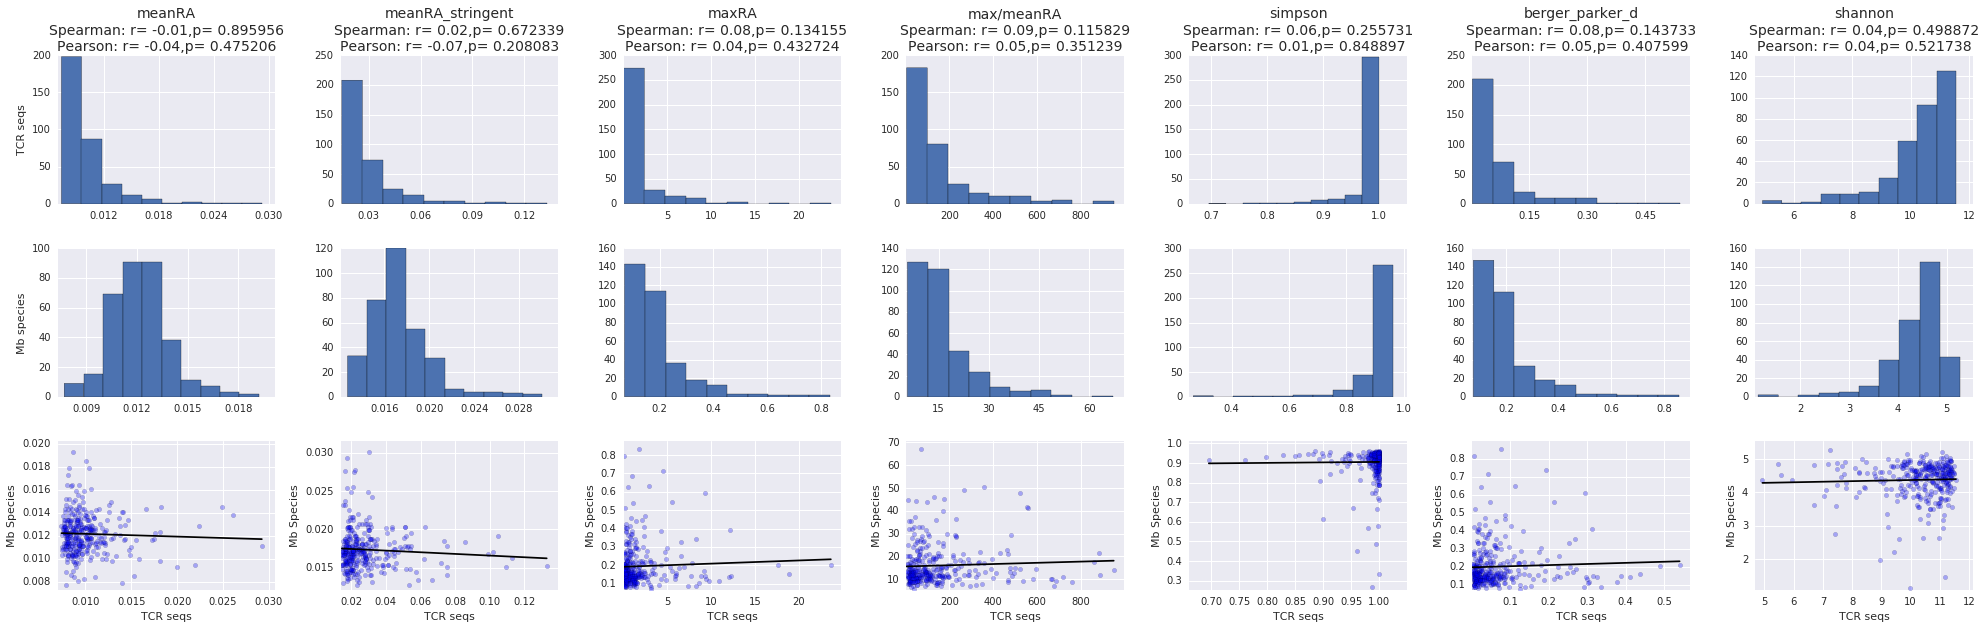

In [25]:
speciesFeatureDF2=speciesFeatureDF2
seqFeatureDF2=seqFeatureDF2
toPlotList=['meanRA','meanRA_stringent','maxRA','max/meanRA','simpson','berger_parker_d','shannon']
outlierSTD=None
datasetFolder=datasetFolder


fig,axes=plot_diversity_correlations_TCR_Mb(speciesFeatureDF2,seqFeatureDF2,toPlotList,outlierSTD,datasetFolder)

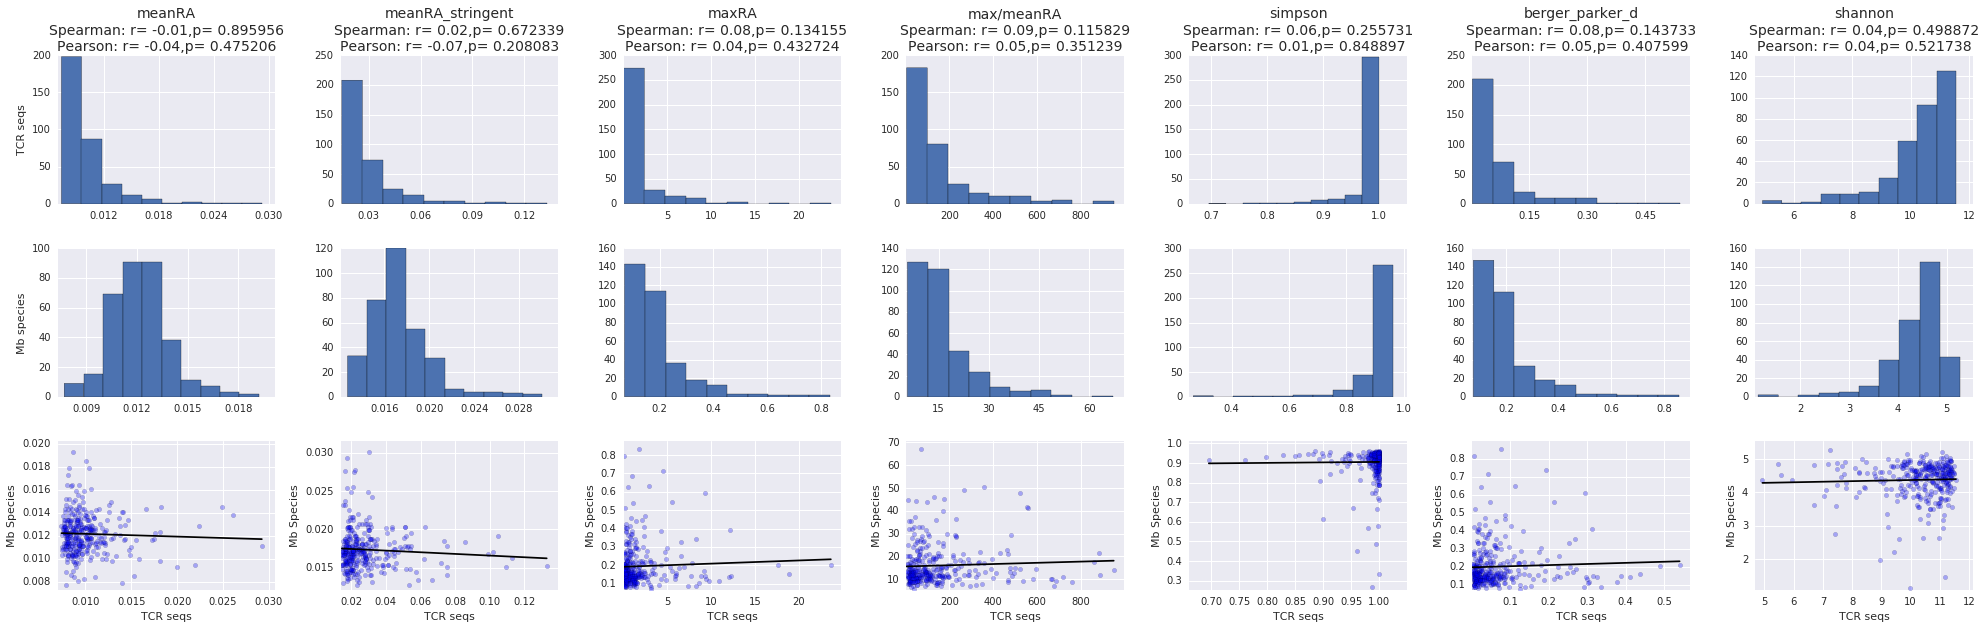

In [26]:
speciesFeatureDF2=speciesFeatureDF2
seqFeatureDF2=seqFeatureDF2
toPlotList=['meanRA','meanRA_stringent','maxRA','max/meanRA','simpson','berger_parker_d','shannon']
outlierSTD=10
datasetFolder=datasetFolder


fig,axes=plot_diversity_correlations_TCR_Mb(speciesFeatureDF2,seqFeatureDF2,toPlotList,outlierSTD,datasetFolder)

         nCom  nCom_stringest    meanRA  meanRA_stringent  meanLogRA  \
BD                                                                     
BD1    2828.0           308.0  0.008043          0.019307  -1.714277   
BD10   2704.0           512.0  0.009643          0.022383  -1.650085   
BD101     NaN           276.0  0.009601          0.024082  -1.618305   
BD105  2512.0           499.0  0.009342          0.020134  -1.696079   
BD106  2730.0           464.0  0.008979          0.020273  -1.693082   

          maxRA  maxRA_stringent  max/meanRA  max/meanRA0  \
BD                                                          
BD1    0.733333         0.733333   91.172333    91.172333   
BD10   0.520000         0.520000   53.927896    53.927896   
BD101  1.100000         1.100000  114.569733   114.569733   
BD105  1.373333         1.373333  147.009091   147.009091   
BD106  0.326667         0.326667   36.380201    36.380201   

       max/meanRA_stringent   simpson  berger_parker_d    shannon  

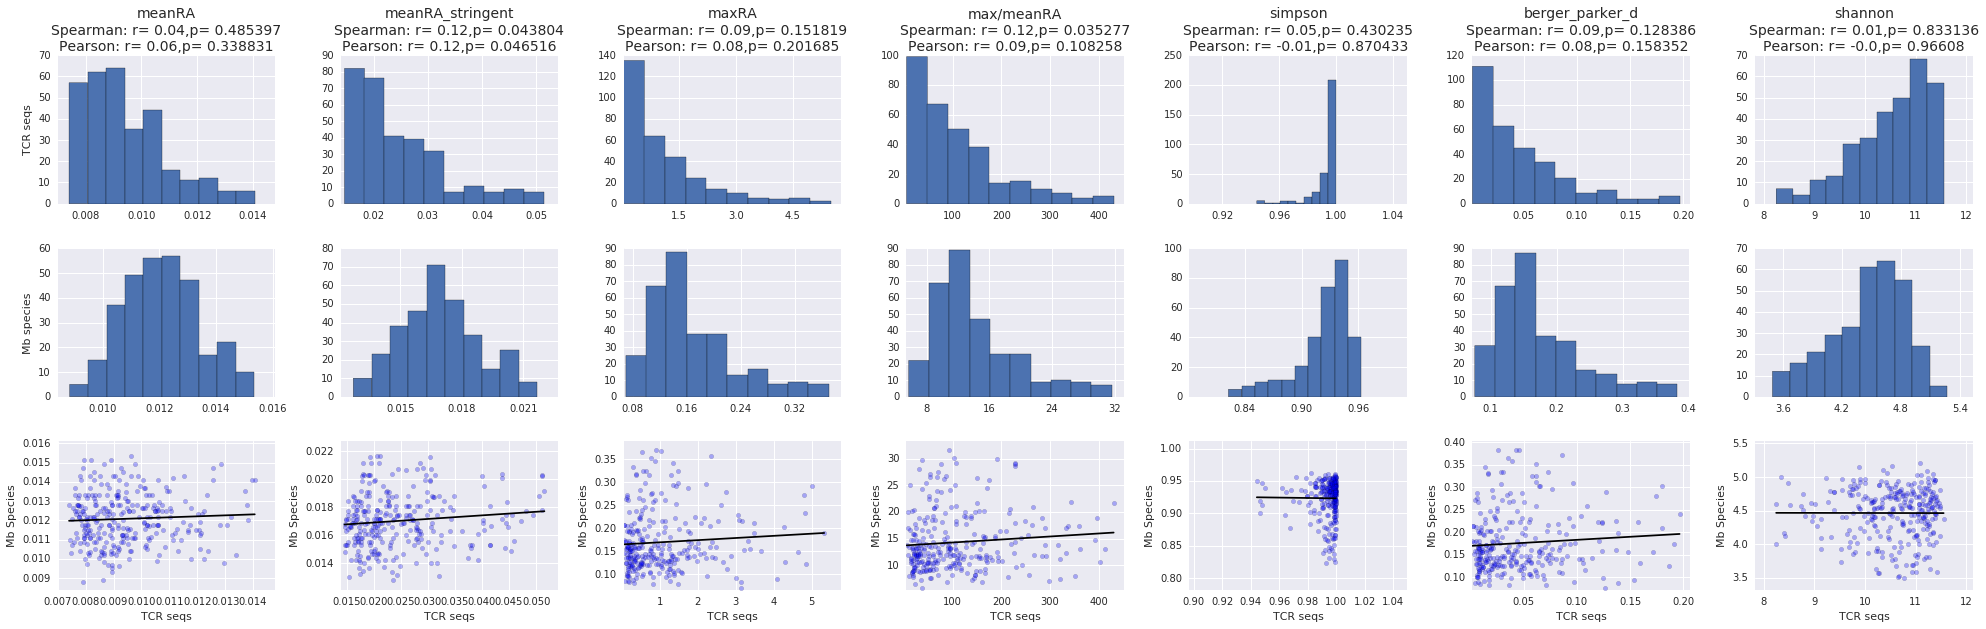

In [30]:
speciesFeatureDF2=speciesFeatureDF2
seqFeatureDF2=seqFeatureDF2
toPlotList=['meanRA','meanRA_stringent','maxRA','max/meanRA','simpson','berger_parker_d','shannon']
outlierSTD=2
datasetFolder=datasetFolder


fig,axes=plot_diversity_correlations_TCR_Mb(speciesFeatureDF2,seqFeatureDF2,toPlotList,outlierSTD,datasetFolder)

# check if can produce sharing matrix from productive sequence only

In [ ]:
datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
datasetName='PNP515_ss15000_rep2'

sharingAnalysisFolder='%s/sharingAnalysis' %datasetFolder
file1='%s/AllUniqueWithCounts' %sharingAnalysisFolder
AllUniqueWithCounts=pd.read_pickle(file1)


In [ ]:
AllUniqueWithCounts

In [ ]:
AllUniqueWithCounts.sort

In [ ]:
AllUniqueWithCounts[AllUniqueWithCounts['isPublic']==1]

In [ ]:
print len(AllUniqueWithCounts)

In [ ]:
onlyProductive=AllUniqueWithCounts[AllUniqueWithCounts['prod_stat']==1]

In [ ]:
print len(onlyProductive)

In [ ]:
float(len(onlyProductive))/len(AllUniqueWithCounts)

In [ ]:
onlyProductive.reset_index().head()

In [ ]:
onlyProductive['seqLen']=onlyProductive.index.str.len()


In [ ]:
strange=onlyProductive[(onlyProductive['seqLen']<3)&(onlyProductive['nShared']<3)]
print len(strange)
strange

In [ ]:
notstrange=onlyProductive[~((onlyProductive['seqLen']<3)&(onlyProductive['nShared']<3))]

In [ ]:
print len(notstrange)

In [ ]:
print len(notstrange)+len(strange)

In [ ]:
print len(onlyProductive)